In [1]:
import entropy.entropy as ent
import exact

In [15]:
%run -d test.py

Breakpoint 1 at /Users/eddie/Dropbox/Research/py_lib/ising_solve/test.py:1
NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
> /Users/eddie/Dropbox/Research/py_lib/ising_solve/test.py(1)<module>()
1---> 1 import exact
      2 import numpy as np
      3 

ipdb> c


In [3]:
where(ones((i))==1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),)

In [4]:
# Write tosolve functions
for i in range(14,16):
    exact.write_eqns(i,0,[where(ones((i))==1),where(triu(np.ones((i,i)),k=1)==1)],
                     writeto="py")
!mv tosolve* ../tosolve01/

In [3]:
# Write tosolve functions
for i in range(4,5):
    exact.write_eqns(i,0,[where(ones((i))==1),where(triu(np.ones((i,i)),k=1)==1)],
                     writeto="py")
!mv tosolve* ../tosolve01/

In [2]:
for i in range(2,10):
    exact.write_eqns(i,1,[where(ones((i))==1),where(triu(np.ones((i,i)),k=1)==1)],
                     writeto="py")
!mv tosolve* ../tosolve11/

### {0,1} formulation. Last checked 2015-04-30

Using randomly generated J.

In [67]:
import tosolve01.tosolve9 as f
n = 9
L = random.normal(size=n+n*(n-1)/2,scale=.2)

In [65]:
f.get_stats(L)

array([ 0.491 ,  0.4456,  0.5087,  0.4162,  0.2266,  0.2571,  0.2166,  0.2101,  0.1867,  0.2138])

In [46]:
Z = 1+exp(L[0])+exp(L[1])+exp(sum(L))
print (exp(L[0])+exp(sum(L)))/Z
print 1/Z

0.446257471626
0.274327901923


In [68]:
p = f.get_probs(L)
print p

si,sisj = ent.calc_sisj(ent.get_all_states(n,sym=False),weighted=p)
print si,sisj

[ 0.0006  0.0005  0.0006  0.0006  0.0007  0.0006  0.0009  0.0009  0.0006  0.0005  0.0005  0.0005  0.0007  0.0006  0.0007  0.0008  0.0006  0.0007  0.0007  0.0009  0.0008  0.0009  0.001   0.0013  0.0011  0.0012  0.001   0.0013  0.0013  0.0015  0.0015  0.002   0.0008  0.0007  0.001   0.0011  0.001   0.0009  0.0016  0.0018  0.001   0.001   0.0011  0.0013  0.0013  0.0013  0.0019  0.0021  0.0006  0.0007  0.0008  0.0011  0.0007  0.0009  0.0013  0.0018  0.0013  0.0015  0.0015  0.0021  0.0017  0.002   0.0026  0.0035  0.0007  0.0006  0.0008  0.0008  0.0009  0.0008  0.0012  0.0013  0.0008  0.0008  0.0008  0.0009  0.001   0.001   0.0012  0.0014  0.0007  0.0008  0.0008  0.0011  0.0009  0.001   0.0013  0.0017  0.0013  0.0016  0.0014  0.0019  0.0018  0.0021  0.0023  0.0031  0.0009  0.0009  0.0013  0.0015  0.0012  0.0012  0.0023  0.0027  0.0014  0.0014  0.0018  0.0021  0.002   0.002   0.0032  0.0037  0.0006  0.0008  0.001   0.0014  0.0009  0.0011  0.0017  0.0024  0.0016  0.0021  0.0022  0.0033  0.0024

In [69]:
J = exact.solve_ising(n,concatenate((si,sisj)),zeros((45)),sym=False)

Distance is 0.000000



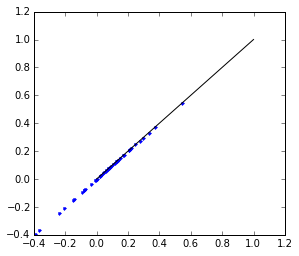

In [70]:
# Seems to work fine...no problem.
fig,ax = plt.subplots(figsize=(4.5,4))
ax.plot(J,L,'.',[0,1],[0,1],'k-')

Using randomly generated data to test solving algorithm.

In [76]:
import mc_ising_solve as mc
import scipy.stats as stats

In [116]:
n = 2
import tosolve01.tosolve2 as f
L = random.normal(size=n+n*(n-1)/2,scale=.2)
data = mc.generate_samples(concatenate([L[1:],L[:1]]),n,1e3)
print mean(data,0)

iters = 16
[ 0.47   0.478]


In [133]:
# Generate random data by sampling directly from probability distribution.
rv = stats.rv_discrete(values=(range(2**n),f.get_probs(L)))
exactData = ent.get_all_states(n)[rv.rvs(size=(1e4))]

In [117]:
si,sisj = ent.calc_sisj(data)
print si,sisj

[ 0.47   0.478] [ 0.202]


In [134]:
print si,sisj
print ent.calc_sisj(exactData)
print f.get_stats(L)

[ 0.47   0.478] [ 0.202]
(array([ 0.5287,  0.4537]), array([ 0.2427]))
[ 0.528   0.4606  0.2477]


In [135]:
# Since something seems to be wrong from mc_ising_solve routine...
si,sisj = ent.calc_sisj(exactData)
J = exact.solve_ising(n,concatenate((si,sisj)),zeros((3)),sym=False)

Distance is 0.000000



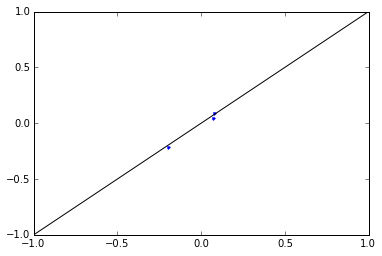

In [139]:
plt.plot( L,J,'.',
        [-1,1],[-1,1],'k-')

### {-1,1} formulation

In [2]:
import tosolve11.tosolve9 as f
n = 9
L = random.normal(size=n+n*(n-1)/2,scale=.2)

In [3]:
f.get_stats(L)

array([ 0.27306203, -0.02618783,  0.09981274, -0.10582944, -0.0147785 ,
        0.2936892 , -0.16785561, -0.00655142,  0.11894657,  0.13654151,
        0.23506534,  0.01970068,  0.2614403 ,  0.41867406, -0.0566117 ,
       -0.21635908, -0.06951404,  0.1750233 , -0.21580043,  0.22667512,
        0.08479226, -0.18043367, -0.05104533, -0.03991841, -0.00758034,
        0.19005293,  0.24838819, -0.11556088, -0.09499991,  0.2083978 ,
        0.0162807 , -0.19227179,  0.02076934, -0.11023114, -0.08375287,
        0.28701932, -0.00619287, -0.31744035, -0.16038306, -0.12940005,
       -0.05647682,  0.05426197, -0.03053915, -0.0563927 ,  0.23848875])

In [4]:
p = f.get_probs(L)
print p

si,sisj = ent.calc_sisj(ent.get_all_states(n,sym=True),weighted=p)

[  2.00930729e-03   1.71378770e-03   3.67670231e-03   7.73554117e-03
   3.16766802e-03   2.54618854e-03   5.10432444e-03   1.01207044e-02
   1.09378718e-03   1.12360292e-03   2.87449766e-03   7.28389303e-03
   1.11528100e-03   1.07970365e-03   2.58107091e-03   6.16370399e-03
   6.12700813e-04   2.97478602e-04   3.52372694e-04   4.22018116e-04
   1.22395517e-03   5.60032235e-04   6.19877402e-04   6.99640416e-04
   1.20305325e-03   7.03495773e-04   9.93700850e-04   1.43335536e-03
   1.55439031e-03   8.56597810e-04   1.13062190e-03   1.53693622e-03
   4.30515080e-03   2.92840334e-03   5.64717829e-03   9.47535733e-03
   5.11442413e-03   3.27853258e-03   5.90780801e-03   9.34180308e-03
   7.89432213e-04   6.46735552e-04   1.48721924e-03   3.00544275e-03
   6.06570647e-04   4.68310094e-04   1.00630132e-03   1.91646876e-03
   1.78628039e-03   6.91653802e-04   7.36435035e-04   7.03388321e-04
   2.68894399e-03   9.81208119e-04   9.76232069e-04   8.78727098e-04
   1.18147906e-03   5.50978350e-04

In [5]:
concatenate((si,sisj))

array([ 0.27306203, -0.02618783,  0.09981274, -0.10582944, -0.0147785 ,
        0.2936892 , -0.16785561, -0.00655142,  0.11894657,  0.13654151,
        0.23506534,  0.01970068,  0.2614403 ,  0.41867406, -0.0566117 ,
       -0.21635908, -0.06951404,  0.1750233 , -0.21580043,  0.22667512,
        0.08479226, -0.18043367, -0.05104533, -0.03991841, -0.00758034,
        0.19005293,  0.24838819, -0.11556088, -0.09499991,  0.2083978 ,
        0.0162807 , -0.19227179,  0.02076934, -0.11023114, -0.08375287,
        0.28701932, -0.00619287, -0.31744035, -0.16038306, -0.12940005,
       -0.05647682,  0.05426197, -0.03053915, -0.0563927 ,  0.23848875])

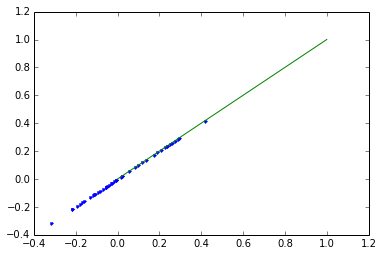

In [6]:
plt.plot(concatenate((si,sisj)),f.get_stats(L),'.',
         [0,1],'-')

In [8]:
J = exact.solve_ising(9,concatenate((si,sisj)),zeros((45)),sym=True)

Distance is 0.000000



/usr/bin/anaconda/lib/python2.7/site-packages/scipy/optimize/minpack.py:237: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


array([ 0.26137447, -0.1088348 , -0.00718948, -0.0976821 , -0.1218028 ,
        0.22045355, -0.16585071, -0.02276788,  0.11381187,  0.1341011 ,
        0.15098284,  0.14476781,  0.0941659 ,  0.39599717,  0.05424821,
       -0.1706631 , -0.10937065,  0.15468806, -0.28672377,  0.23106242,
       -0.11022821, -0.21361174,  0.02663774, -0.05751836,  0.06881876,
        0.1201098 ,  0.16200303, -0.06699355, -0.09272291,  0.3002838 ,
        0.07699796, -0.2720274 , -0.07073825, -0.08322059, -0.05656769,
        0.32072128,  0.05919011, -0.28935339, -0.14086259, -0.10893635,
        0.09050139,  0.04649458, -0.03178344, -0.01482851,  0.22572332])

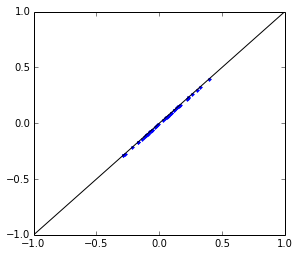

In [14]:
# This is the symmetrized formulation.
fig,ax = plt.subplots(figsize=(4.5,4))
ax.plot(J,L,'.',[-1,1],[-1,1],'k-')